In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load CSV files
file_path_ob = 'output_ob_all.csv'
file_path_hy = 'output_hy_all.csv'
file_path_ed = 'output_ed_all.csv'
file_path_cl = 'output_cl_all.csv'

In [3]:
data_ob = pd.read_csv(file_path_ob)
data_hy = pd.read_csv(file_path_hy)
data_ed = pd.read_csv(file_path_ed)
data_cl = pd.read_csv(file_path_cl)


In [4]:
# Calculate average utilization of all metrics for each implementation
avg_metrics_ob = data_ob.drop(columns=['timestamp', 'Total Requests']).mean()
avg_metrics_hy = data_hy.drop(columns=['timestamp', 'Total Requests']).mean()
avg_metrics_ed = data_ed.drop(columns=['timestamp', 'Total Requests']).mean()
avg_metrics_cl = data_cl.drop(columns=['timestamp', 'Total Requests']).mean()

In [5]:
avg_metrics_ob

Overall CPU Usage (%)                 8.270815e+01
Overall Memory Usage (%)              5.143099e+01
Overall Disk Read (bytes/s)           8.629930e+07
Overall Disk Write (bytes/s)          1.122641e+07
Overall Network Upload (bytes/s)      5.763303e+05
Overall Network Download (bytes/s)    4.885597e+06
Overall GPU Usage (%)                 1.749383e+00
Overall GPU Memory Used (MB)          8.634656e+00
dtype: float64

In [6]:
avg_metrics_hy

Overall CPU Usage (%)                 8.351444e+01
Overall Memory Usage (%)              6.065580e+01
Overall Disk Read (bytes/s)           8.101769e+07
Overall Disk Write (bytes/s)          1.707528e+07
Overall Network Upload (bytes/s)      1.504374e+05
Overall Network Download (bytes/s)    4.044724e+06
Overall GPU Usage (%)                 0.000000e+00
Overall GPU Memory Used (MB)          0.000000e+00
dtype: float64

In [7]:
avg_metrics_ed

Overall CPU Usage (%)                 8.506309e+01
Overall Memory Usage (%)              5.980605e+01
Overall Disk Read (bytes/s)           7.621000e+07
Overall Disk Write (bytes/s)          1.605200e+07
Overall Network Upload (bytes/s)      1.338604e+05
Overall Network Download (bytes/s)    3.808722e+06
Overall GPU Usage (%)                 0.000000e+00
Overall GPU Memory Used (MB)          0.000000e+00
dtype: float64

In [8]:
avg_metrics_cl

Overall CPU Usage (%)                 3.413494e+01
Overall Memory Usage (%)              4.498728e+01
Overall Disk Read (bytes/s)           2.860414e+06
Overall Disk Write (bytes/s)          1.404402e+06
Overall Network Upload (bytes/s)      9.897973e+05
Overall Network Download (bytes/s)    3.720218e+06
Overall GPU Usage (%)                 0.000000e+00
Overall GPU Memory Used (MB)          0.000000e+00
dtype: float64

In [9]:
max_values = pd.concat([avg_metrics_ob, avg_metrics_hy, avg_metrics_ed, avg_metrics_cl], axis=1).max(axis=1)
max_values

Overall CPU Usage (%)                 8.506309e+01
Overall Memory Usage (%)              6.065580e+01
Overall Disk Read (bytes/s)           8.629930e+07
Overall Disk Write (bytes/s)          1.707528e+07
Overall Network Upload (bytes/s)      9.897973e+05
Overall Network Download (bytes/s)    4.885597e+06
Overall GPU Usage (%)                 1.749383e+00
Overall GPU Memory Used (MB)          8.634656e+00
dtype: float64

In [10]:
# Normalize each metric to a scale between 0 and 100
norm_metrics_ob = (avg_metrics_ob / max_values) * 100
norm_metrics_hy = (avg_metrics_hy / max_values) * 100
norm_metrics_ed = (avg_metrics_ed / max_values) * 100
norm_metrics_cl = (avg_metrics_cl / max_values) * 100

In [11]:
norm_metrics_ob

Overall CPU Usage (%)                  97.231539
Overall Memory Usage (%)               84.791538
Overall Disk Read (bytes/s)           100.000000
Overall Disk Write (bytes/s)           65.746588
Overall Network Upload (bytes/s)       58.227103
Overall Network Download (bytes/s)    100.000000
Overall GPU Usage (%)                 100.000000
Overall GPU Memory Used (MB)          100.000000
dtype: float64

In [12]:
norm_metrics_hy

Overall CPU Usage (%)                  98.179419
Overall Memory Usage (%)              100.000000
Overall Disk Read (bytes/s)            93.879892
Overall Disk Write (bytes/s)          100.000000
Overall Network Upload (bytes/s)       15.198804
Overall Network Download (bytes/s)     82.788739
Overall GPU Usage (%)                   0.000000
Overall GPU Memory Used (MB)            0.000000
dtype: float64

In [13]:
norm_metrics_ed

Overall CPU Usage (%)                 100.000000
Overall Memory Usage (%)               98.599057
Overall Disk Read (bytes/s)            88.308949
Overall Disk Write (bytes/s)           94.007261
Overall Network Upload (bytes/s)       13.524020
Overall Network Download (bytes/s)     77.958166
Overall GPU Usage (%)                   0.000000
Overall GPU Memory Used (MB)            0.000000
dtype: float64

In [14]:
norm_metrics_cl

Overall CPU Usage (%)                  40.128967
Overall Memory Usage (%)               74.168146
Overall Disk Read (bytes/s)             3.314527
Overall Disk Write (bytes/s)            8.224768
Overall Network Upload (bytes/s)      100.000000
Overall Network Download (bytes/s)     76.146648
Overall GPU Usage (%)                   0.000000
Overall GPU Memory Used (MB)            0.000000
dtype: float64

In [15]:
# Calculate the average of the normalized values for each implementation
avg_norm_utilization = {
    'Oblique': norm_metrics_ob.mean(),
    'Hybrid': norm_metrics_hy.mean(),
    'Edge': norm_metrics_ed.mean(),
    'Cloud': norm_metrics_cl.mean()
}

In [16]:
avg_norm_utilization

{'Oblique': 88.249595965478,
 'Hybrid': 61.255856802819466,
 'Edge': 59.049681610900066,
 'Cloud': 37.74788206864629}

In [18]:
# Calculate the average of the normalized values for each implementation
avg_norm_utilization = {
    'Cloud': norm_metrics_cl.mean(),
    'Edge': norm_metrics_ed.mean(),
    'Hybrid': norm_metrics_hy.mean(),
    'Oblique': norm_metrics_ob.mean(),
}

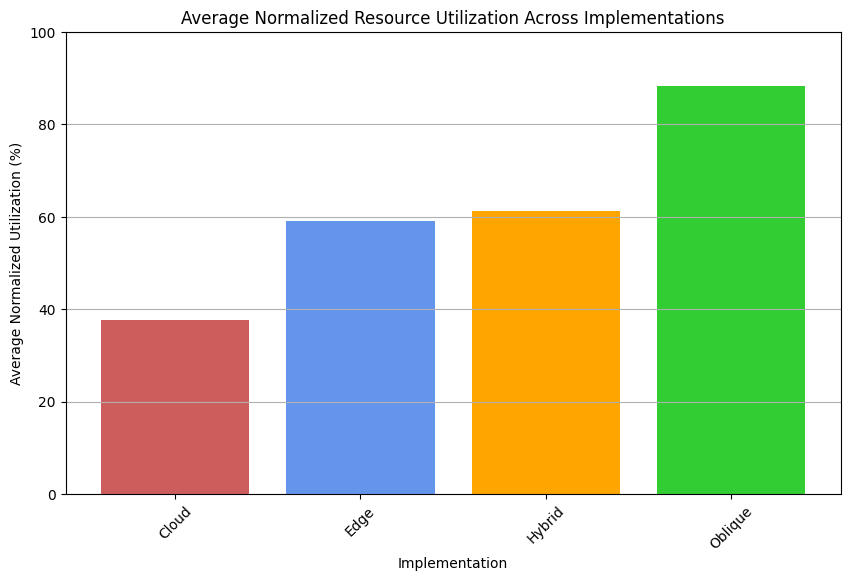

In [19]:
# Convert to DataFrame for plotting
avg_norm_utilization_df = pd.DataFrame(list(avg_norm_utilization.items()), columns=['Implementation', 'Average Normalized Utilization'])

# Plotting the average normalized resource utilization for each implementation
plt.figure(figsize=(10, 6))
plt.bar(avg_norm_utilization_df['Implementation'], avg_norm_utilization_df['Average Normalized Utilization'], color=['indianred', 'cornflowerblue', 'orange', 'limegreen'])
plt.title('Average Normalized Resource Utilization Across Implementations')
plt.xlabel('Implementation')
plt.ylabel('Average Normalized Utilization (%)')
plt.ylim(0, 100)  # Ensuring the y-axis is scaled from 0 to 100
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='-')
plt.savefig("aggregated_resource_usage.png")
plt.show()